In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import numpy as np
import torch
import scanpy as sc
import muon as mu
import anndata
import mudata
import pandas as pd
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [3]:
DATA_DIR = "/media/yob/nacho_stuff/prostate_cancer/Integration/MVAE-PoE/OtF-prostate/data/"
mdata = mu.read(DATA_DIR + "mdata_preprocessed_final_filtered.h5mu")
mdata

MuData object with n_obs × n_vars = 42475 × 31460
  obs:	'sample', 'tissue', 'patient', 'ann', 'imagerow', 'imagecol'
  2 modalities
    rna:	42475 x 18950
      obs:	'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes', 'size_factors', 'sample', 'type', 'patient', 'ann', 'tissue', 'imagerow', 'imagecol'
      obsm:	'spatial'
      layers:	'counts', 'scran_normalization', 'spotclean'
    msi:	42475 x 12510
      obs:	'ST_barcode', 'sample', 'tissue', 'patient', 'ann', 'imagerow', 'imagecol'
      obsm:	'spatial'

In [4]:
msi = mdata["msi"]
msi

AnnData object with n_obs × n_vars = 42475 × 12510
    obs: 'ST_barcode', 'sample', 'tissue', 'patient', 'ann', 'imagerow', 'imagecol'
    obsm: 'spatial'

In [16]:
from src.types import TrainParams
train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, add_lisi_loss=False)

In [17]:
from src.vae.model import VAE
from src.model import ModelParams

model_dict = torch.load('mvae_params/vae_params_no_lisi_20230319-171734.pt', map_location='cuda')
model_params = ModelParams(beta=0.01, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)

torch.set_num_threads(16)
model_no_lisi = VAE(mdata["msi"].copy(), model_params)
model_no_lisi.load_state_dict(model_dict)

<All keys matched successfully>

100%|█████████████████████████████████████████| 332/332 [00:23<00:00, 14.02it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be igno

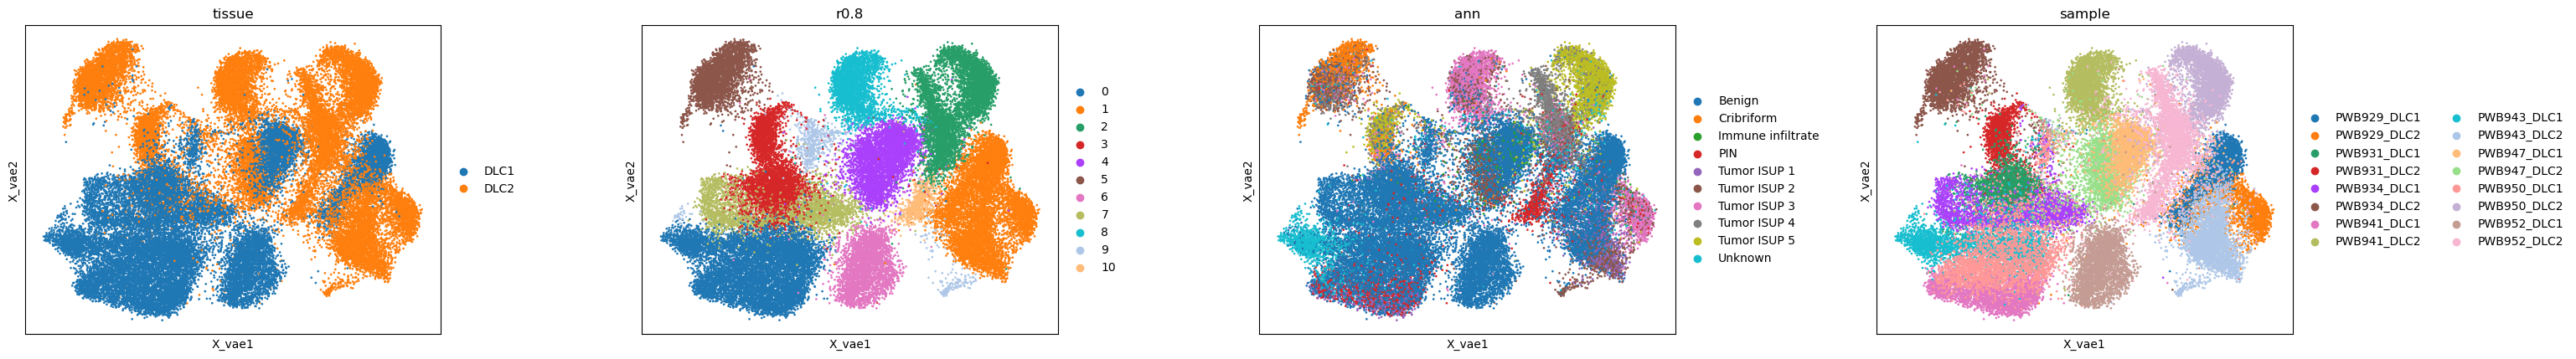

In [15]:
from src.vae.diagnostics import plot_embedding
plot_embedding(model_no_lisi, msi, train_params)

In [19]:
from src.vae.diagnostics import classification_performance
classification_performance(model_no_lisi, mdata["msi"].copy(), train_params)

0.6906613398016694